In [2]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 1. Simple data 형성

In [3]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 특정 지역 A의 범죄 건수라고 가정 (중심도 이해와 동일)
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


## 1-1. 데이터 시각화

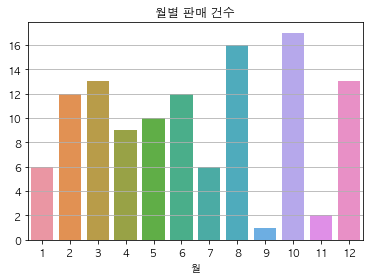

In [8]:
# 데이터 보기 (시각화로 각 원소별 개수를 출력)

sns.barplot(x= list(map(lambda x: x , range(1,13))), y=X)
plt.title('월별 판매 건수')
plt.xlabel('월')
plt.grid(axis='y')
plt.show()

## 1-2. 분산도 이해

### A. 범위

In [9]:
# 오름차순 정렬
tmp_data = sorted(X)
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
최소값 : 1
최댓값 : 17


In [11]:
# max, min 매서드 활용
print(f'특정 지역 A의 범죄 건수 데이터 : {X.tolist()}')

print(f'최솟값 : {min(X)}')
print(f'최댓값 : {max(X)}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'A 회사의 월별 판매 건수 데이터의 범위는 최소 {min(X)}에서 최대 {max(X)}로 {round(max(X) - min(X),2)}의 범위를 가지고 있습니다.')


특정 지역 A의 범죄 건수 데이터 : [6, 12, 13, 9, 10, 12, 6, 16, 1, 17, 2, 13]
최솟값 : 1
최댓값 : 17
A 회사의 월별 판매 건수 데이터의 범위는 최소 1에서 최대 17로 16의 범위를 가지고 있습니다.


### B. 분산

In [7]:
n = len(X)
m = X.mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
print(pow(X-m, 2))
resid = pow(X-m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

[1.40625e+01 5.06250e+00 1.05625e+01 5.62500e-01 6.25000e-02 5.06250e+00
 1.40625e+01 3.90625e+01 7.65625e+01 5.25625e+01 6.00625e+01 1.05625e+01]
편차의 제곱합의 평균, 즉 분산은 24.020833333333332입니다.


In [15]:
# numpy를 이용한 분산값 도출
np.var(X)

24.020833333333332

### C. 표준편차

In [16]:
# 표준편차는 분산의 제곱근입니다.
print(pow(np.var(X),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((X)))

4.90110531751087
4.90110531751087


### D. 왜도

In [17]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((X - m)/std, 3)
print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

편차/표쥰편차의 3제곱 : [-0.44793159673025457, 0.09675322489373499, 0.29158687941225747, -0.003583452773842037, 0.00013272047310526058, 0.09675322489373499, -0.44793159673025457, 2.0737573922696972, -5.690390284388049, 3.236919618564201, -3.9538756142788194, 0.29158687941225747]
왜도 : -0.3713518837485193


### E. 첨도

In [18]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((X - m) / std), 4)
print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

편차/표쥰편차의 4제곱 : [0.34272748266334907, 0.04441748175317004, 0.19335584458958832, 0.0005483639722613585, 6.7699255834735595e-06, 0.04441748175317004, 0.34272748266334907, 2.6445021810443605, 10.159119578700013, 4.788239736604764, 6.252168444775088, 0.19335584458958832]
첨도 : -0.9162011089138096


In [19]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(X)

-0.9162011089138105

# 데이터 불러오기

In [12]:
import yfinance

# 야후 파이낸스를 이용하여 주가 정보를 다운받습니다.
samsung_price = yfinance.download('005930.KS', '2022-01-01', '2022-01-18')
samsung_price

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,78700.0,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,77400.0,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,76900.0,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,78300.0,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,78000.0,9947422
2022-01-11,78400.0,79000.0,78000.0,78900.0,78900.0,13221123
2022-01-12,79500.0,79600.0,78600.0,78900.0,78900.0,11000502
2022-01-13,79300.0,79300.0,77900.0,77900.0,77900.0,13889401
2022-01-14,77700.0,78100.0,77100.0,77300.0,77300.0,10096725


Date
2022-01-04    78700.0
2022-01-05    77400.0
2022-01-06    76900.0
2022-01-07    78300.0
2022-01-10    78000.0
2022-01-11    78900.0
2022-01-12    78900.0
2022-01-13    77900.0
2022-01-14    77300.0
2022-01-17    77500.0
Name: Adj Close, dtype: float64


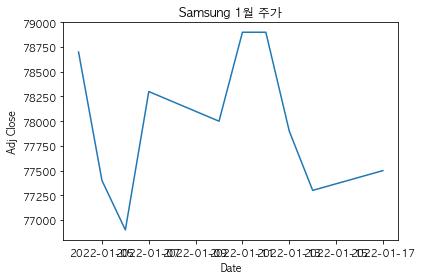

In [13]:
# 데이터 보기
print(samsung_price['Adj Close'])

sns.lineplot(x=samsung_price.index,
             y=samsung_price['Adj Close'], 
             data=samsung_price)
plt.title('Samsung 1월 주가')
plt.show()

## 분산도 이해 실습

### A. 범위

In [14]:
# 오름차순 정렬
tmp_data = sorted(samsung_price['Adj Close'])
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [76900.0, 77300.0, 77400.0, 77500.0, 77900.0, 78000.0, 78300.0, 78700.0, 78900.0, 78900.0]
최소값 : 76900.0
최댓값 : 78900.0


In [19]:
# max, min 매서드 활용
print(f'조정 주가 데이터 : {samsung_price["Adj Close"]}')

print(f'최솟값 : {min(samsung_price["Adj Close"])}')
print(f'최댓값 : {max(samsung_price["Adj Close"])}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'검거율 데이터의 범위는 최소 {min(samsung_price["Adj Close"])}에서 최대 {max(samsung_price["Adj Close"])}로 {round(max(samsung_price["Adj Close"]) - min(samsung_price["Adj Close"]),2)}의 범위를 가지고 있습니다.')


조정 주가 데이터 : Date
2022-01-04    78700.0
2022-01-05    77400.0
2022-01-06    76900.0
2022-01-07    78300.0
2022-01-10    78000.0
2022-01-11    78900.0
2022-01-12    78900.0
2022-01-13    77900.0
2022-01-14    77300.0
2022-01-17    77500.0
Name: Adj Close, dtype: float64
최솟값 : 76900.0
최댓값 : 78900.0
검거율 데이터의 범위는 최소 76900.0에서 최대 78900.0로 2000.0의 범위를 가지고 있습니다.


In [20]:
def min_max(data, columns):
    print(f'검거율 데이터 : {data[columns].tolist()}')
    print(f'최솟값 : {min(data[columns])}')
    print(f'최댓값 : {max(data[columns])}')
    print(f"'{columns}' 데이터의 범위는 최소 {min(data[columns])}에서 최대 {max(data[columns])}로 {round(max(data[columns]) - min(data[columns]),2)}의 범위를 가지고 있습니다.")

min_max(samsung_price, "Adj Close")


검거율 데이터 : [78700.0, 77400.0, 76900.0, 78300.0, 78000.0, 78900.0, 78900.0, 77900.0, 77300.0, 77500.0]
최솟값 : 76900.0
최댓값 : 78900.0
'Adj Close' 데이터의 범위는 최소 76900.0에서 최대 78900.0로 2000.0의 범위를 가지고 있습니다.


### B. 분산

In [21]:
n = len(samsung_price)
m = samsung_price['Adj Close'].mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
print(pow(samsung_price['Adj Close']-m, 2).values)
resid = pow(samsung_price['Adj Close']-m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

[5.1840e+05 3.3640e+05 1.1664e+06 1.0240e+05 4.0000e+02 8.4640e+05
 8.4640e+05 6.4000e+03 4.6240e+05 2.3040e+05]
편차의 제곱합의 평균, 즉 분산은 451600.0입니다.


In [23]:
def varianve(data, columns):
    n = len(data)
    m = data[columns].mean()

    # 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
    # 편차 = 변량 - 평균
    print(pow(data[columns]-m, 2).values)
    resid = pow(data[columns]-m, 2)

    # 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
    print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')
    
varianve(samsung_price, "Adj Close")

[5.1840e+05 3.3640e+05 1.1664e+06 1.0240e+05 4.0000e+02 8.4640e+05
 8.4640e+05 6.4000e+03 4.6240e+05 2.3040e+05]
편차의 제곱합의 평균, 즉 분산은 451600.0입니다.


In [25]:
# numpy의 var 매서드를 활용한 분산 도출

np.var(samsung_price['Adj Close'])

451600.0

### C. 표준편차

In [26]:
# 표준편차는 분산의 제곱근입니다.
print(pow(np.var(samsung_price['Adj Close']),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((samsung_price['Adj Close'])))

672.0119046564577
672.0119046564577


### D. 왜도

In [27]:
# 변수 설정
n = len(samsung_price['Adj Close'])
m = samsung_price['Adj Close'].mean()
std = np.std(samsung_price['Adj Close'])

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((samsung_price['Adj Close'] - m)/std, 3)
print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

편차/표쥰편차의 3제곱 : [1.2298909035427112, -0.6429142928348589, -4.150881799456649, 0.10797396135354392, 2.636083040858006e-05, 2.565857788649548, 2.565857788649548, -0.0016870931461491238, -1.0360860783788304, -0.36441211956821074]
왜도 : 0.027362541964106136


In [28]:
# 함수화 작업
def skewness(data):
    n = len(data)
    m = data.mean()
    std = np.std(data)
    
    tmp_result = pow((data - m)/std, 3)
    result = sum(tmp_result)/n
    return result


skewness(samsung_price['Adj Close'])

0.027362541964106136

In [29]:
# 라이브러리 import로 구한 skew
from scipy.stats import skew

skew(samsung_price['Adj Close'])

0.027362541964106094

### E. 첨도

In [30]:
# 변수 설정
n = len(samsung_price['Adj Close'])
m = samsung_price['Adj Close'].mean()
std = np.std(samsung_price['Adj Close'])

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((samsung_price['Adj Close'] - m) / std), 4)
print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

편차/표쥰편차의 4제곱 : [1.317716910094686, 0.5548864346902384, 6.670941857354347, 0.05141526123826241, 7.845346258279786e-07, 3.5127192676212364, 3.5127192676212364, 0.00020084086421196253, 1.048401863740457, 0.2602897600187034]
첨도 : -1.3070707752221995


In [31]:
# 함수화
def kurtosis_self(data):
    n = len(data)
    m = data.mean()
    std = np.std(data)
    
    tmp_result = pow(((data - m) / std), 4)
    result = sum(tmp_result)/n - 3
    return result

kurtosis_self(samsung_price['Adj Close'])

-1.3070707752221995

In [32]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(samsung_price['Adj Close'])

-1.3070707752221997

## 참고

In [33]:
def describe_data(data, column, returns = True):
    """[summary]

    Args:
        data ([dataframe]): [데이터프레임 이름을 입력합니다]
        column ([string]): [컬럼명을 입력합니다]
        returns (bool, optional): [describe()함수를 이용한 출력 결과를 표시하는지 여부입니다.]. 기본값은 True입니다.

    Returns:
        [type]: [describe()함수를 이용한 출력 결과를 표시]
    """
    
    for i in [0,1,2,3,5,7]:
        print(f"데이터 컬럼 명 '{column}'의 {data[column].describe().index[i]}는 \
            {round(data[column].describe()[i],2)}입니다.")
        
    if returns == True:
        return data[column].describe()
    else :
        return 

# describe_data(data, '검거율')
describe_data(samsung_price, 'Adj Close', returns = False)

데이터 컬럼 명 'Adj Close'의 count는             10.0입니다.
데이터 컬럼 명 'Adj Close'의 mean는             77980.0입니다.
데이터 컬럼 명 'Adj Close'의 std는             708.36입니다.
데이터 컬럼 명 'Adj Close'의 min는             76900.0입니다.
데이터 컬럼 명 'Adj Close'의 50%는             77950.0입니다.
데이터 컬럼 명 'Adj Close'의 max는             78900.0입니다.
